# Hyperparamerter analysis

This notebook is driven by the question 'What are the best hyperparameters for the model?'.

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
model_folder = ['1_ccff', '2_cff', '3_cccff', '4_cf', '5_ccf', '6_cccf', '7_ccccff', '8_ccccf', '9_cccccf', '10_cccccff', '13_cccfff']
model_folder = model_folder[2]
main_path = '/fhgfs/users/jbehnken/01_Data/04_Models'

model_name = model_folder.split('_')[-1]
df = pd.read_csv(os.path.join(main_path, model_folder, model_name+'_Hyperparameter.csv'))
df.describe()

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Time
count,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,1.000000e-03,165.036364,3.909091,17.236364,119.963636,89.493281,0.939312,52200.000000,1090.208027
std,6.534985e-19,54.274688,1.000417,7.111081,69.105149,0.640959,0.010390,11536.778047,512.336322
min,1.000000e-03,64.000000,3.000000,4.000000,9.000000,87.970006,0.919805,42000.000000,314.675027
25%,1.000000e-03,124.000000,3.000000,11.000000,65.500000,89.125004,0.926112,50000.000000,674.908836
50%,1.000000e-03,170.000000,3.000000,17.000000,114.000000,89.575008,0.943979,50000.000000,1032.793227
75%,1.000000e-03,208.750000,5.000000,23.000000,175.500000,89.937511,0.947086,50000.000000,1366.234448
max,1.000000e-03,256.000000,5.000000,32.000000,254.000000,90.620005,0.953443,100000.000000,2790.693419


In [4]:
df.tail()

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Early_Stopped,Time,Title
105,0.001,227,5,17,61,90.350014,0.928110,50000,False,1853.024356,Random_Plotting
106,0.001,220,3,11,31,90.310001,0.951020,50000,False,1438.079606,Random_Plotting
107,0.001,179,3,16,160,89.530015,0.948122,50000,False,1562.604766,Random_Plotting
108,0.001,204,3,9,221,88.030005,0.946400,50000,False,1117.640532,Random_Plotting
109,0.001,127,3,10,109,90.010011,0.928213,50000,False,852.179972,Random_Plotting


# Hyperparameter ordered by best auc-value

In [5]:
df.sort_values(by='Auc', ascending=False).head(10)

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Early_Stopped,Time,Title
57,0.001,169,5,9,32,90.600008,0.953443,50000,False,489.509731,Optimizing
8,0.001,139,5,11,17,89.930004,0.953414,100000,False,898.652810,Optimizing
6,0.001,83,3,14,43,90.490013,0.952812,100000,False,639.716341,Optimizing
59,0.001,253,3,5,24,90.000010,0.952101,50000,False,427.794354,Optimizing
9,0.001,64,5,19,77,89.730012,0.951122,100000,False,690.033698,Optimizing
106,0.001,220,3,11,31,90.310001,0.951020,50000,False,1438.079606,Random_Plotting
104,0.001,138,5,23,113,90.620005,0.950802,50000,False,1913.902495,Random_Plotting
34,0.001,137,3,8,9,90.350002,0.950717,50000,False,622.459063,Optimizing
50,0.001,206,3,11,28,90.460002,0.950304,50000,False,1029.781351,Optimizing
40,0.001,128,3,8,134,89.830005,0.949995,50000,False,607.488338,Optimizing


In [6]:
df[df['Title']=='Optimizing_Run_1'].sort_values(by='Auc', ascending=False).head(15)

,Learning_Rate,Batch_Size,Patch_Size,Depth,Hidden_Nodes,Accuracy,Auc,Steps,Early_Stopped,Time,Title


# Scattermatrix to compare every variable

In [7]:
def plotScattermatrix(df):
    plt.style.use('seaborn-ticks')
    pd.plotting.scatter_matrix(df[df['Auc']>0.8][['Hidden_Nodes', 'Depth', 'Patch_Size', 'Batch_Size', 'Accuracy', 'Auc']], alpha=1.0, figsize=(10, 10), c='b', diagonal='kde')
    plt.show()
    
def plotCorrelation(df):
    plt.style.use('seaborn-white')
    f, ax = plt.subplots(figsize=(12, 3))
    corr = df[['Hidden_Nodes', 'Depth', 'Patch_Size', 'Batch_Size', 'Accuracy', 'Auc']].corr()
    sns.heatmap(corr.tail(2), mask=np.zeros_like(corr.tail(2), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)
    plt.show()

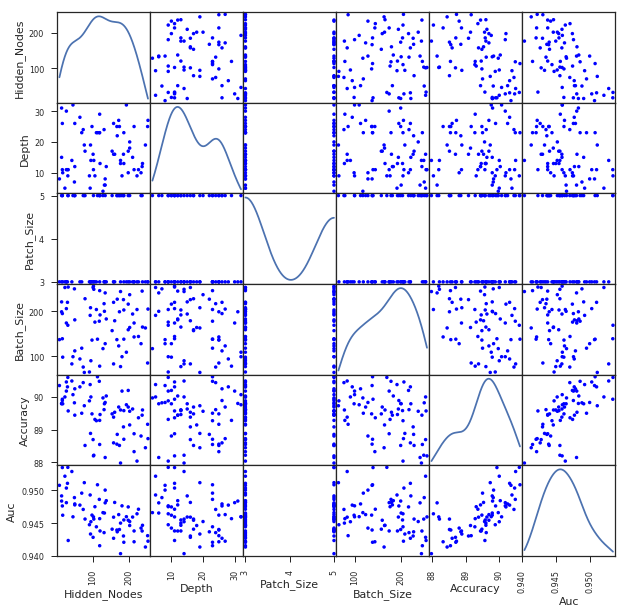

Correlation - All CNNs


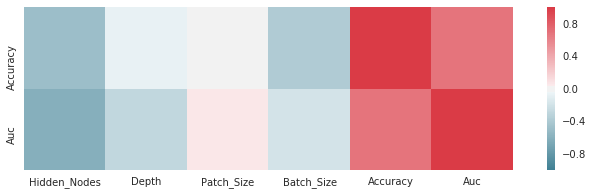

In [8]:
plotScattermatrix(df[df['Auc']>=0.94])
print('Correlation - All CNNs')
plotCorrelation(df[df['Auc']>=0.94])

In [11]:
for column in ['Patch_Size']:
    mean = df[df['Auc']>0.8].groupby(column)['Auc'].mean().sort_values(ascending=False)
    print(mean)

Patch_Size
3    0.940227
5    0.938716
Name: Auc, dtype: float64
